In [1]:
# load the packages
#the new name of the RCTD package is spacexr
library(spacexr)
library(Seurat)
library(ggplot2)
library(dplyr)
library(Matrix)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#loading reference data
hnc <- read.delim("/home/uqkngu23/90days/software/hncancer_collab_analysis/GSE103322_HNSCC_all_data.txt.gz", header = T, stringsAsFactors = F)

head(hnc)

X                              HN28_P15_D06_S330_comb HN28_P6_G05_S173_comb
1 processed by Maxima enzyme     1                      1                    
2 Lymph node                     1                      0                    
3 classified  as cancer cell     0                      0                    
4 classified as non-cancer cells 1                      1                    
5 non-cancer cell type           Fibroblast             Fibroblast           
6 'C9orf152'                     0                      0                    
  HN26_P14_D11_S239_comb HN26_P14_H05_S281_comb HN26_P25_H09_S189_comb
1 1.00000                1                      1                     
2 1.00000                1                      1                     
3 1.00000                0                      1                     
4 0.00000                1                      0                     
5 0.00000                Fibroblast             0                     
6 0.42761                0                      0                     
  HN26_P14_H06_S282_comb HN25_P25_C04_S316_comb HN26_P25_A11_S107_comb
1 1                      1                      1                     
2 1                      1                      1                     
3 1                      1                      0                     
4 0                      0                      1                     
5 0                      0                      Fibroblast            
6 0                      0                      0                     
  HN26_P25_C09_S129_comb ⋯ HNSCC20_P3_B10_S22_comb HNSCC20_P13_B11_S215_comb
1 1                      ⋯ 0                       0                        
2 1                      ⋯ 0                       1                        
3 1                      ⋯ 1                       1                        
4 0                      ⋯ 0                       0                        
5 0                      ⋯ 0                       0                        
6 0                      ⋯ 0                       0                        
  HNSCC20_P3_C08_S32_comb HNSCC17_P4_H03_S183_comb HNSCC20_P3_F09_S69_comb
1 0                       0                        0                      
2 0                       0                        0                      
3 1                       1                        1                      
4 0                       0                        0                      
5 0                       0                        0                      
6 0                       0                        0                      
  HNSCC17_P4_G12_S180_comb HNSCC20_P13_C05_S221_comb HNSCC17_P4_C12_S132_comb
1 0                        0                         0                       
2 0                        1                         0                       
3 0                        1                         1                       
4 0                        0                         0                       
5 0                        0                         0                       
6 0                        0                         0                       
  HNSCC20_P3_H08_S92_comb HNSCC20_P3_G06_S78_comb
1 0                       0                      
2 0                       0                      
3 1                       1                      
4 0                       0                      
5 0                       0                      
6 0                       0

In [3]:
# Pull only gene information
hnc_genes <- hnc[-1:-5,] ##first 5 rows are not genes - want to remove this

# Duplicate gene names so make names unique (up to you how you want to deal with this part)
gene_list <- hnc_genes %>% 
  pull("X") %>% 
  make.unique(sep = ".")

# Add back unique rownames
rownames(hnc_genes) <- gene_list

# Remove Column of gene names
hnc_genes <- hnc_genes[, -1]

head(hnc_genes)

HN28_P15_D06_S330_comb HN28_P6_G05_S173_comb HN26_P14_D11_S239_comb
'C9orf152' 0                      0                     0.42761               
'RPS11'    6.0037                 7.3006                7.28850               
'ELMO2'    0                      0                     0.00000               
'CREB3L1'  0                      0                     0.00000               
'PNMA1'    5.1474                 5.3329                2.83370               
'MMP2'     0                      0                     0.00000               
           HN26_P14_H05_S281_comb HN26_P25_H09_S189_comb HN26_P14_H06_S282_comb
'C9orf152' 0                      0.00000                0.0000                
'RPS11'    0                      7.47420                6.9548                
'ELMO2'    5.2465                 0.50487                0.0000                
'CREB3L1'  0                      0.00000                0.0000                
'PNMA1'    5.7507                 0.19661                1.9949                
'MMP2'     0                      0.36065                0.0000                
           HN25_P25_C04_S316_comb HN26_P25_A11_S107_comb HN26_P25_C09_S129_comb
'C9orf152' 0.0000                 0                      0.0000                
'RPS11'    5.9743                 6.465                  6.5628                
'ELMO2'    0.0000                 3.4154                 0.0000                
'CREB3L1'  0.0000                 0                      0.0000                
'PNMA1'    0.0000                 2.1541                 3.5815                
'MMP2'     0.0000                 0                      0.0000                
           HNSCC26_P24_H05_S377_comb ⋯ HNSCC20_P3_B10_S22_comb
'C9orf152' 0.0000                    ⋯ 0.0000                 
'RPS11'    7.9486                    ⋯ 6.8747                 
'ELMO2'    1.9613                    ⋯ 0.0000                 
'CREB3L1'  0.0000                    ⋯ 0.0000                 
'PNMA1'    0.0000                    ⋯ 3.0332                 
'MMP2'     0.0000                    ⋯ 0.0000                 
           HNSCC20_P13_B11_S215_comb HNSCC20_P3_C08_S32_comb
'C9orf152' 0.00000                   0.0000                 
'RPS11'    5.96490                   4.8252                 
'ELMO2'    0.62106                   0.0000                 
'CREB3L1'  0.00000                   0.0000                 
'PNMA1'    0.00000                   0.0000                 
'MMP2'     0.00000                   0.0000                 
           HNSCC17_P4_H03_S183_comb HNSCC20_P3_F09_S69_comb
'C9orf152' 0.0000                   0.0000                 
'RPS11'    7.5167                   7.3249                 
'ELMO2'    0.0000                   0.0000                 
'CREB3L1'  0.0000                   0.0000                 
'PNMA1'    0.0000                   0.0000                 
'MMP2'     0.0000                   0.0000                 
           HNSCC17_P4_G12_S180_comb HNSCC20_P13_C05_S221_comb
'C9orf152' 0.0000                   0.0000                   
'RPS11'    5.3595                   7.4281                   
'ELMO2'    0.0000                   0.0000                   
'CREB3L1'  0.0000                   0.0000                   
'PNMA1'    0.0000                   0.0000                   
'MMP2'     4.5537                   0.0000                   
           HNSCC17_P4_C12_S132_comb HNSCC20_P3_H08_S92_comb
'C9orf152' 0.0000                   0.0000                 
'RPS11'    6.8439                   6.8676                 
'ELMO2'    3.2863                   0.0000                 
'CREB3L1'  0.0000                   0.0000                 
'PNMA1'    0.0000                   5.3462                 
'MMP2'     0.0000                   0.0000                 
           HNSCC20_P3_G06_S78_comb
'C9orf152' 0.0000                 
'RPS11'    6.3146                 
'ELMO2'    3.5905                 
'CREB3L1'  0.0000                 
'PNMA1'    0.0000    

In [4]:
mygenes <- rownames(hnc_genes)
mygenes <- gsub("\\'", "", mygenes)
#head(mygenes)

hnc_genes2 <- hnc_genes
rownames(hnc_genes2) <- mygenes
hnc_genes2[1:5,1:5]
#head(hnc_genes2) 

HN28_P15_D06_S330_comb HN28_P6_G05_S173_comb HN26_P14_D11_S239_comb
C9orf152 0                      0                     0.42761               
RPS11    6.0037                 7.3006                7.28850               
ELMO2    0                      0                     0.00000               
CREB3L1  0                      0                     0.00000               
PNMA1    5.1474                 5.3329                2.83370               
         HN26_P14_H05_S281_comb HN26_P25_H09_S189_comb
C9orf152 0                      0.00000               
RPS11    0                      7.47420               
ELMO2    5.2465                 0.50487               
CREB3L1  0                      0.00000               
PNMA1    5.7507                 0.19661

In [5]:
# Pull meta data columns from original data
hnc_meta <- hnc[1:5,]

head(hnc_meta)

X                              HN28_P15_D06_S330_comb HN28_P6_G05_S173_comb
1 processed by Maxima enzyme     1                      1                    
2 Lymph node                     1                      0                    
3 classified  as cancer cell     0                      0                    
4 classified as non-cancer cells 1                      1                    
5 non-cancer cell type           Fibroblast             Fibroblast           
  HN26_P14_D11_S239_comb HN26_P14_H05_S281_comb HN26_P25_H09_S189_comb
1 1                      1                      1                     
2 1                      1                      1                     
3 1                      0                      1                     
4 0                      1                      0                     
5 0                      Fibroblast             0                     
  HN26_P14_H06_S282_comb HN25_P25_C04_S316_comb HN26_P25_A11_S107_comb
1 1                      1                      1                     
2 1                      1                      1                     
3 1                      1                      0                     
4 0                      0                      1                     
5 0                      0                      Fibroblast            
  HN26_P25_C09_S129_comb ⋯ HNSCC20_P3_B10_S22_comb HNSCC20_P13_B11_S215_comb
1 1                      ⋯ 0                       0                        
2 1                      ⋯ 0                       1                        
3 1                      ⋯ 1                       1                        
4 0                      ⋯ 0                       0                        
5 0                      ⋯ 0                       0                        
  HNSCC20_P3_C08_S32_comb HNSCC17_P4_H03_S183_comb HNSCC20_P3_F09_S69_comb
1 0                       0                        0                      
2 0                       0                        0                      
3 1                       1                        1                      
4 0                       0                        0                      
5 0                       0                        0                      
  HNSCC17_P4_G12_S180_comb HNSCC20_P13_C05_S221_comb HNSCC17_P4_C12_S132_comb
1 0                        0                         0                       
2 0                        1                         0                       
3 0                        1                         1                       
4 0                        0                         0                       
5 0                        0                         0                       
  HNSCC20_P3_H08_S92_comb HNSCC20_P3_G06_S78_comb
1 0                       0                      
2 0                       0                      
3 1                       1                      
4 0                       0                      
5 0                       0

In [6]:
# Make rownames equal to column 1 values
rownames(hnc_meta) <- hnc_meta[, 1]

# Remove column 1
hnc_meta <- hnc_meta[, -1]

# Transpose meta data as Seurat expects meta data to have cell names as rows and meta data values as columns
hnc_meta_transpose <- data.frame(t(hnc_meta))

# Create Seurat Object
hnc_seurat <- CreateSeuratObject(counts = hnc_genes2, meta.data = hnc_meta_transpose)
head(hnc_seurat@meta.data)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


orig.ident nCount_RNA nFeature_RNA
HN28_P15_D06_S330_comb HN28       10863.073  4286        
HN28_P6_G05_S173_comb  HN28        8215.891  2723        
HN26_P14_D11_S239_comb HN26       14733.938  6965        
HN26_P14_H05_S281_comb HN26        8777.818  3451        
HN26_P25_H09_S189_comb HN26       13060.127  7355        
HN26_P14_H06_S282_comb HN26       15784.340  7744        
                       processed.by.Maxima.enzyme Lymph.node
HN28_P15_D06_S330_comb 1                          1         
HN28_P6_G05_S173_comb  1                          0         
HN26_P14_D11_S239_comb 1                          1         
HN26_P14_H05_S281_comb 1                          1         
HN26_P25_H09_S189_comb 1                          1         
HN26_P14_H06_S282_comb 1                          1         
                       classified..as.cancer.cell
HN28_P15_D06_S330_comb 0                         
HN28_P6_G05_S173_comb  0                         
HN26_P14_D11_S239_comb 1                         
HN26_P14_H05_S281_comb 0                         
HN26_P25_H09_S189_comb 1                         
HN26_P14_H06_S282_comb 1                         
                       classified.as.non.cancer.cells non.cancer.cell.type
HN28_P15_D06_S330_comb 1                              Fibroblast          
HN28_P6_G05_S173_comb  1                              Fibroblast          
HN26_P14_D11_S239_comb 0                              0                   
HN26_P14_H05_S281_comb 1                              Fibroblast          
HN26_P25_H09_S189_comb 0                              0                   
HN26_P14_H06_S282_comb 0                              0

In [8]:
#replacing 0 with cancer cell in non.cancer.cell.type column
hnc_seurat$non.cancer.cell.type <- ifelse(hnc_seurat$non.cancer.cell.type == 0, "cancer cell", hnc_seurat$non.cancer.cell.type)

In [2]:
#loading query data
#LOADING VISIUM DATA
#loading array A2 dataset
outdir <- "/home/uqkngu23/90days/software/hncancer_collab_analysis" #where to store the output
datadir <- "/home/uqkngu23/90days/software/head_neck_cancer_VLP39_A2_outs" #must contain filtered_feature_bc_matrix.h5 file, and 
mysample_A2 <- Load10X_Spatial(datadir, filename = "filtered_feature_bc_matrix.h5", assay = "Spatial")

Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”


In [3]:
#demultiplexing samples
#adding recurrence info
my.tissues_A2 <- read.delim("/home/uqkngu23/90days/software/head_neck_cancer_VLP39_A2_outs/A1_recurrent.csv", sep = ",", header = TRUE)
my.tissues_A2$recurrent <- sub("^$", "N", my.tissues_A2$recurrent)

#add annotations into mysample
#A2
mysample_A2[["recurrent"]] <- my.tissues_A2$recurrent

#splitting array into individual tissues
tissueID_A2 <- read.delim("/home/uqkngu23/90days/software/head_neck_cancer_VLP39_A2_outs/A2_tissue.csv", sep = ",", header = TRUE)
#adding annotation to full data
mysample_A2[["tissues"]] <- tissueID_A2$Tissue

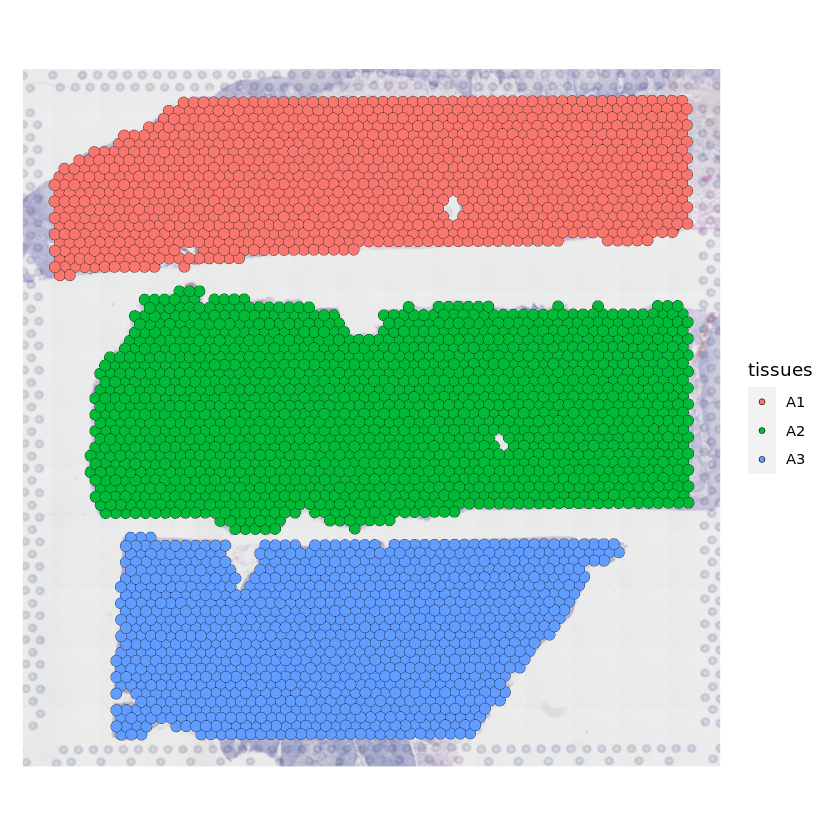

In [4]:
SpatialPlot(mysample_A2, group.by = "tissues")

In [11]:
#total genes = 17943 -> remove spots with <20% genes? ~3,500 genes -> using <500 should be okay
##QC
#removing spots with less then 100 genes
selected_c <- WhichCells(mysample_A2, expression = nFeature_Spatial > 100)
#removing genes that are in less then 3 spots
selected_f <- rownames(mysample_A2)[Matrix::rowSums(mysample_A2) > 3]
data.filt_A <- subset(mysample_A2, features = selected_f, cells = selected_c)

In [12]:
#loading RCTD results
myRCTD_full <- readRDS("/home/uqkngu23/90days/software/hncancer_collab_analysis/rctd_outs/myRCTD_full.RDS")
myRCTD_db <- readRDS("/home/uqkngu23/90days/software/hncancer_collab_analysis/rctd_outs/myRCTD_doublet.RDS")

In [13]:
#assigning data
query <- data.filt_A
#ref <- hnc_seurat
#refcol <- hnc_seurat$non.cancer.cell.type"non.cancer.cell.type"
#refcol <- "non.cancer.cell.type"

In [13]:
head(ref@assays$RNA@counts)
#can't use this method if the data is NOT raw counts -> must be raw counts/integers

   [[ suppressing 5902 column names ‘HN28_P15_D06_S330_comb’, ‘HN28_P6_G05_S173_comb’, ‘HN26_P14_D11_S239_comb’ ... ]]



6 x 5902 sparse Matrix of class "dgCMatrix"
                                                                         
C9orf152 .      .      0.42761 .      .       .      .      .      .     
RPS11    6.0037 7.3006 7.28850 .      7.47420 6.9548 5.9743 6.4650 6.5628
ELMO2    .      .      .       5.2465 0.50487 .      .      3.4154 .     
CREB3L1  .      .      .       .      .       .      .      .      .     
PNMA1    5.1474 5.3329 2.83370 5.7507 0.19661 1.9949 .      2.1541 3.5815
MMP2     .      .      .       .      0.36065 .      .      .      .     
                                                                          
C9orf152 .      .      .      .      .      . .      .      .       .     
RPS11    7.9486 6.0752 7.5230 7.5368 5.9077 . 5.2684 7.9218 7.34550 6.4325
ELMO2    1.9613 .      2.7790 .      .      . 3.3842 .      0.08134 .     
CREB3L1  .      .      .      .      .      . .      .      0.71282 .     
PNMA1    .      4.4585 1.7403 5.4838 .      . .      .      .  

In [13]:
# Prepare the reference data
counts_ref <- as.matrix(ref@assays$RNA@counts)
#round numbers to an integer
counts_ref <- round(counts_ref, digits = 0)
cell_types_ref <- as.factor(ref[[]][,refcol])
names(cell_types_ref) <- colnames(ref)
reference <- spacexr::Reference(counts = counts_ref, cell_types = cell_types_ref)
saveRDS(reference, paste0(outdir, "SCRef.RDS"))


Warning message in if (class(counts) != "dgCMatrix") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(counts) != "matrix") tryCatch({:
“the condition has length > 1 and only the first element will be used”


# Prepare the query data

In [14]:
print("defining functions to get coordinates")
## coordinates
getcoords <- function(whichImageNbr) {
  coords <- query@images[[whichImageNbr]]@coordinates[c(5,4)]
  colnames(coords) <- c("x", "y")
  coords$y <- coords$y * -1
  name <- names(query@images)[whichImageNbr]
  coords$image <- name
  coords <- as.data.frame(coords)
  return(coords)
}

[1] "defining functions to get coordinates"


In [15]:
modifycoords <- function(whichImageNbr) {
  max_prev <- max(coords_all[[whichImageNbr - 1]]$x)
  coords_all[[whichImageNbr]]$x <- coords_all[[whichImageNbr]]$x + max_prev
  return(coords_all)
}


In [16]:
print("getting coordinates")
### get the coordinates from each image, and then combine into a list of lists
coords_all <- lapply(1:length(names(query@images)), getcoords) #could unlist if this is at the end
# now for each list we add an x-axis factor so we can put all the lists together
if (length(coords_all) > 1) {
  # get the starting coords to add to the 2nd array
  max1 <- max(coords_all[[1]]$x)
  # for the 2nd array, add coordinates of the first one
  coords_all[[2]]$x <- coords_all[[2]]$x + max1
  # for all subsequent arrays, add the coordinates of the previous one
  if (length(coords_all) > 2) {
    coords_all <- lapply(3:length(names(query@images)), modifycoords) #could unlist if this is at the end
  } else {coords_all <- list(coords_all)}
} else {coords_all <- list(coords_all)}
# this won't actually work with 4 arrays, and IDK if it will work with 2
saveRDS(coords_all, file = paste0(outdir, "coords_all_interim.RDS"))

print("finalising coordinates 1")
coords_all <- coords_all[[1]]
print("finalising coordinates 2")


[1] "getting coordinates"
[1] "finalising coordinates 1"
[1] "finalising coordinates 2"


In [17]:
#converting to df
coords_all <- do.call(rbind.data.frame, coords_all)

[1] "plotting coordinates"
[1] "saving coordinates plot"


Saving 6.67 x 6.67 in image



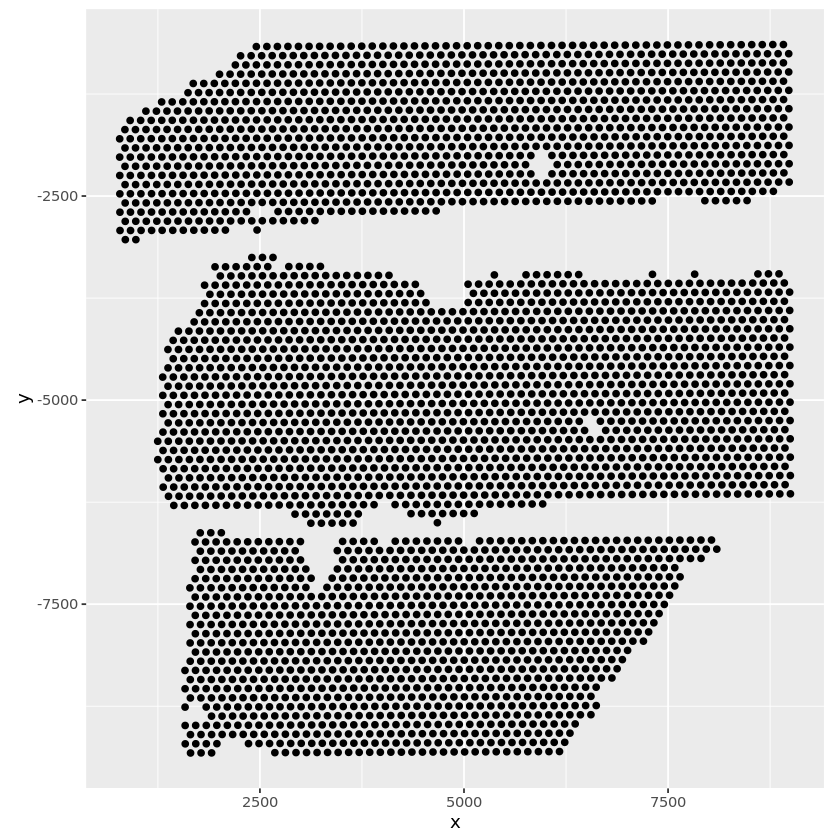

In [18]:
print("plotting coordinates")
#print(colnames(coords_all))
p3 <- ggplot(coords_all, aes(x = x, y = y)) + geom_point() + coord_fixed()
p3
print("saving coordinates plot")
ggsave(plot = p3, filename = paste0(outdir, "coord_plot.jpeg"))
write.table(coords_all, file = paste0(outdir, "allcoordinates.txt"), sep = "\t", quote = FALSE)


In [21]:
coords_all_RCTD <- coords_all[1:2]
write.table(data.frame("barcodes"=rownames(coords_all_RCTD),coords_all_RCTD),paste0(outdir, "Coordinates.csv"), row.names=FALSE, sep = ",", quote = FALSE, col.names = c("barcodes", "xcoord", "ycoord"))


In [22]:
### Get counts
print("preparing counts")
counts <- as.matrix(query@assays[[1]]@counts) #get whatever the first one is i.e. raw data
write.table(counts,paste0(outdir, "MappedDGEForR.csv"), sep = ",", quote = FALSE, col.names = NA)


[1] "preparing counts"


In [23]:
### Make RCTD object (puck)
print("preparing RCTD object")
puck <- SpatialRNA(coords = coords_all_RCTD, counts = counts[colnames(counts) %in% rownames(coords_all_RCTD),])
saveRDS(puck, file = paste0(outdir, "puckObject.RDS"))
barcodes <- colnames(puck@counts) #pixels to be used (a list of barcode names). 

jpeg(filename = paste0(outdir, "puckCoords.jpeg"))
plot_puck_continuous(puck, barcodes, puck@nUMI, ylimit = c(0,round(quantile(puck@nUMI,0.9))), 
                     title ='plot of nUMI') 
dev.off()


[1] "preparing RCTD object"


Warning message in if (class(counts) != "dgCMatrix") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(counts) != "matrix") tryCatch({:
“the condition has length > 1 and only the first element will be used”


png 
  2

# RUN RCTD

In [24]:
print("step 3 - running RCTD")
myRCTD <- create.RCTD(puck, reference, max_cores = 8, CELL_MIN_INSTANCE = 10)
saveRDS(myRCTD, file = paste0(outdir, "myRCTD_preRun.RDS"))
myRCTD_db <- run.RCTD(myRCTD, doublet_mode = "doublet")
myRCTD_full <- run.RCTD(myRCTD, doublet_mode = "full")
myRCTD_multi <- run.RCTD(myRCTD, doublet_mode = "multi")


[1] "step 3 - running RCTD"


Begin: process_cell_type_info

process_cell_type_info: number of cells in reference: 5902

process_cell_type_info: number of genes in reference: 23686




-Fibroblast      B cell cancer cell   Dendritic Endothelial  Fibroblast 
         18         138        2539          51         260        1422 
 Macrophage        Mast     myocyte      T cell 
         98         120          19        1237 


End: process_cell_type_info

create.RCTD: getting regression differentially expressed genes: 

get_de_genes: -Fibroblast found DE genes: 91

get_de_genes: B cell found DE genes: 279

get_de_genes: cancer cell found DE genes: 111

get_de_genes: Dendritic found DE genes: 308

get_de_genes: Endothelial found DE genes: 172

get_de_genes: Fibroblast found DE genes: 170

get_de_genes: Macrophage found DE genes: 268

get_de_genes: Mast found DE genes: 235

get_de_genes: myocyte found DE genes: 352

get_de_genes: T cell found DE genes: 197

get_de_genes: total DE genes: 1788

create.RCTD: getting platform effect normalization differentially expressed genes: 

get_de_genes: -Fibroblast found DE genes: 503

get_de_genes: B cell found DE genes: 579

get_de_genes: cancer cell found DE genes: 492

get_de_genes: Dendritic found DE genes: 706

get_de_genes: Endothelial found DE genes: 442

get_de_genes: Fibroblast found DE genes: 403

get_de_genes: Macrophage found DE genes: 607

get_de_genes: Mast f

[1] "gather_results: finished 1000"
[1] "gather_results: finished 2000"
[1] "gather_results: finished 3000"


fitBulk: decomposing bulk

chooseSigma: using initial Q_mat with sigma =  1

Likelihood value: 1795553.16590596

Sigma value:  0.84

Likelihood value: 1767601.77704232

Sigma value:  0.69

Likelihood value: 1748167.53332778

Sigma value:  0.61

Likelihood value: 1741592.95650125

Sigma value:  0.53

Likelihood value: 1738412.62249844

Sigma value:  0.51

Likelihood value: 1738223.80790214

Sigma value:  0.51

fitBulk: decomposing bulk

chooseSigma: using initial Q_mat with sigma =  1

Likelihood value: 1797479.61420242

Sigma value:  0.84

Likelihood value: 1769582.29794248

Sigma value:  0.69

Likelihood value: 1750275.6916112

Sigma value:  0.61

Likelihood value: 1743811.51859308

Sigma value:  0.53

Likelihood value: 1740774.41826503

Sigma value:  0.51

Likelihood value: 1740627.21085065

Sigma value:  0.51



In [24]:
print("saving RCTD")
outdir <- "/home/uqkngu23/90days/software/hncancer_collab_analysis/rctd_outs/"
saveRDS(myRCTD_db, file = paste0(outdir, "myRCTD_doublet.RDS"))
saveRDS(myRCTD_full, file = paste0(outdir, "myRCTD_full.RDS"))
saveRDS(myRCTD_multi, file = paste0(outdir, "myRCTD_multi.RDS"))


[1] "saving RCTD"


# Normalise weights

In [14]:
norm_weights = sweep(myRCTD_full@results$weights, 1, rowSums(myRCTD_full@results$weights), '/')

In [15]:
#colnames(norm_weights) <- paste0(colnames(norm_weights), "_wt")
colnames(norm_weights) <- c("X.Fibroblast_wt", "B.cell_wt", "cancer.cell_wt", "Dendritic_wt", "Endothelial_wt", "Fibroblast_wt", "Macrophage_wt", "Mast_wt", "myocyte_wt", "T.cell_wt")

In [16]:
outdir <- "/home/uqkngu23/90days/software/hncancer_collab_analysis/rctd_outs/"
#write.table(norm_weights, file = paste0(outdir, "normalisedWeights.txt"), sep = "\t", quote = FALSE, col.names = NA)

In [17]:
# visualise scores in ST data
query <- AddMetaData(query, norm_weights)

In [18]:
#subset each dataset, and calculate aspect ratios
# get cells
A1_cells <- names(which(query$tissues == "T1"))
A2_cells <- names(which(query$tissues == "T2"))
A3_cells <- names(which(query$tissues == "T3"))

In [62]:
head(A1_cells)
head(A2_cells)
head(A3_cells)

[1] "AAACAATCTACTAGCA-1" "AAACAGAGCGACTCCT-1" "AAACCACTACACAGAT-1"
[4] "AAACGAAGAACATACC-1" "AAACGACAGTCTTGCC-1" "AAACGCCCGAGATCGG-1"

[1] "AAACAGCTTTCAGAAG-1" "AAACAGGGTCTATATT-1" "AAACCCGAACGAAATC-1"
[4] "AAACCGGGTAGGTACC-1" "AAACCGTTCGTCCAGG-1" "AAACCTCATGAAGTTG-1"

[1] "AAACACCAATAACTGC-1" "AAACAGTGTTCCTGGG-1" "AAACATTTCCCGGATT-1"
[4] "AAACCTAAGCAGCCGG-1" "AAACGGGCGTACGGGT-1" "AAACGGTTGCGAACTG-1"

In [19]:
# subset
A1 <- subset(query, cells = A1_cells)
A2 <- subset(query, cells = A2_cells)
A3 <- subset(query, cells = A3_cells)

In [69]:
A1@images$slice1


Spatial data from the VisiumV1 technology for 1137 samples
Associated assay: Spatial 
Image key: slice1_ 

In [20]:
#calculating ratios
coord_A1 <- GetTissueCoordinates(object = A1)
coord_A2 <- GetTissueCoordinates(object = A2)
coord_A3 <- GetTissueCoordinates(object = A3)


In [21]:
ratio_A1 <- (max(coord_A1$imagerow) - min(coord_A1$imagerow)) / (max(coord_A1$imagecol) - min(coord_A1$imagecol))
ratio_A2 <- (max(coord_A2$imagerow) - min(coord_A2$imagerow)) / (max(coord_A2$imagecol) - min(coord_A2$imagecol))
ratio_A3 <- (max(coord_A3$imagerow) - min(coord_A3$imagerow)) / (max(coord_A3$imagecol) - min(coord_A3$imagecol))


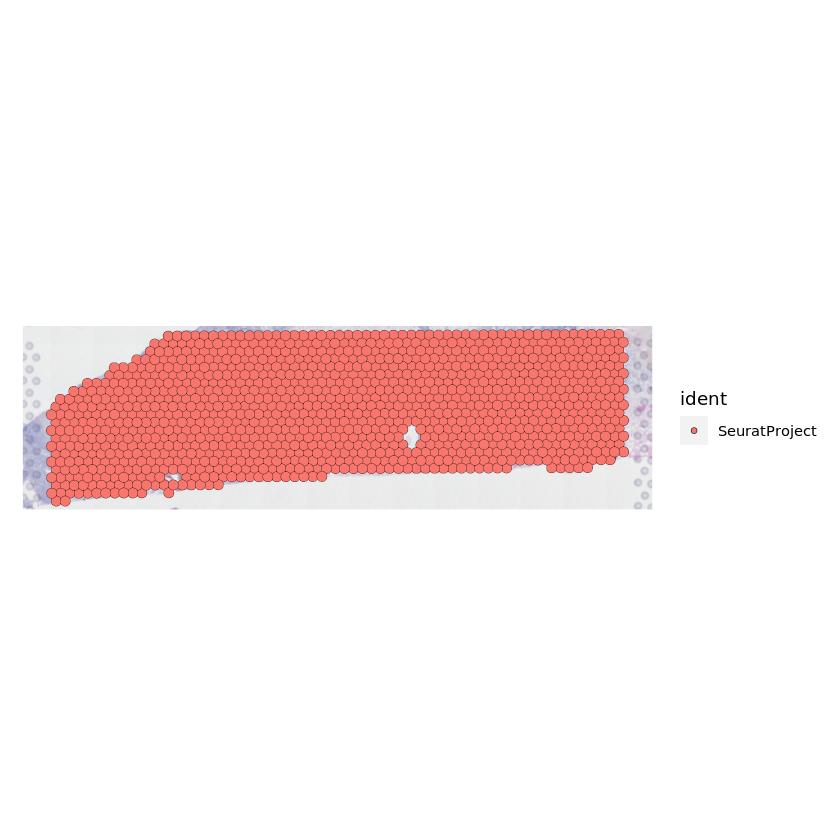

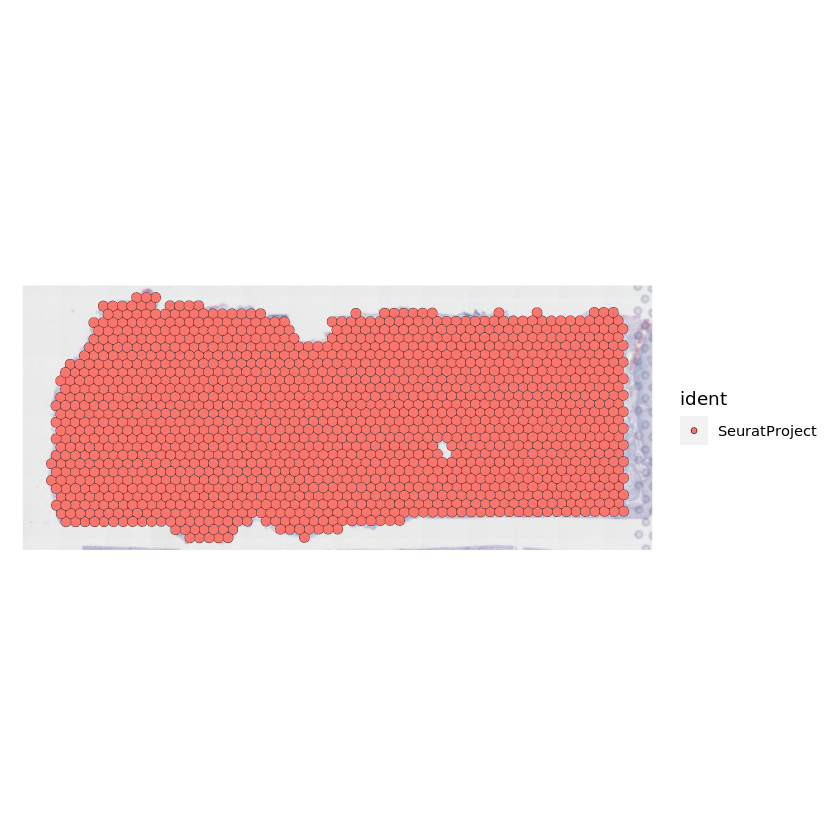

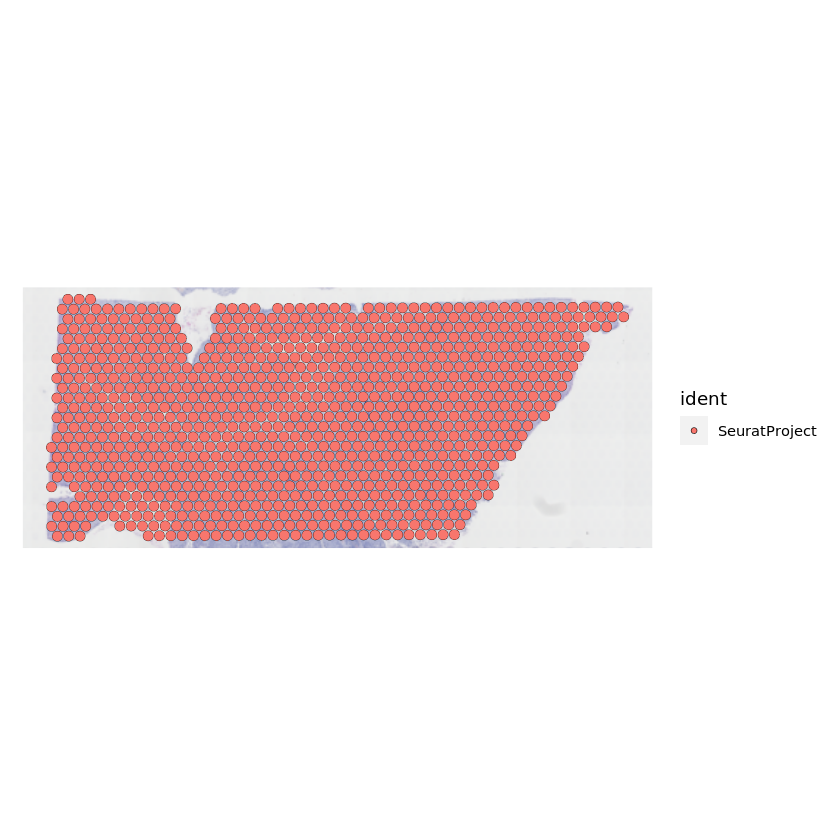

In [22]:
# Test the ratios
SpatialDimPlot(A1) + #, group.by = "tissues", pt.size.factor = 7) + 
   theme(aspect.ratio = ratio_A1)
SpatialDimPlot(A2) + #, group.by = "tissues", pt.size.factor = 7) + 
   theme(aspect.ratio = ratio_A2)
SpatialDimPlot(A3) + #, group.by = "tissues", pt.size.factor = 6) + 
   theme(aspect.ratio = ratio_A3)

In [23]:
dir.create(file.path(outdir, "scores_ownscore_pdf"), showWarnings = FALSE)
dir.create(file.path(outdir, "scores_zeroToOne_pdf"), showWarnings = FALSE)

In [24]:
library(RColorBrewer)

In [25]:
for (i in colnames(norm_weights)) {
  # make sure each plot has the same scale
  data_A1 <- SpatialFeaturePlot(A1, features = i)
  data_A2 <- SpatialFeaturePlot(A2, features = i)
  data_A3 <- SpatialFeaturePlot(A3, features = i)
  data <- rbind(data_A1$data, data_A2$data, data_A3$data)
  maxval <- max(data[,i], na.rm = TRUE)
  
  # plot the graphs with a celltype-specific scale
  p_A1 <- SpatialFeaturePlot(A1, features = i) + 
    theme(aspect.ratio = ratio_A1) +
    scale_fill_gradientn(limits = c(0, maxval), colors = rev(brewer.pal(9, "RdYlBu")))
  p_A2 <- SpatialFeaturePlot(A2, features = i) + 
    theme(aspect.ratio = ratio_A2) +
    scale_fill_gradientn(limits = c(0, maxval), colors = rev(brewer.pal(9, "RdYlBu")))
  p_A3 <- SpatialFeaturePlot(A3, features = i) + 
    theme(aspect.ratio = ratio_A3) +
    scale_fill_gradientn(limits = c(0, maxval), colors = rev(brewer.pal(9, "RdYlBu")))
  p_T2 <- p_A1 + p_A2 + p_A3
    
  ggsave(plot = p_A1, filename = paste0(outdir, "scores_ownscore_pdf/", "weights_", i, "_A1_ownscale.pdf"))  
  ggsave(plot = p_A2, filename = paste0(outdir, "scores_ownscore_pdf/", "weights_", i, "_A2_ownscale.pdf"))  
  ggsave(plot = p_A3, filename = paste0(outdir, "scores_ownscore_pdf/", "weights_", i, "_A3_ownscale.pdf"))  
  ggsave(plot = p_T2, filename = paste0(outdir, "scores_ownscore_pdf/", "weights_", i, "_T2_ownscale.pdf"))  
    
    # plot the graphs with zero-to-one scale
  p_A1 <- SpatialFeaturePlot(A1, features = i) + 
    theme(aspect.ratio = ratio_A1) +
    scale_fill_gradientn(limits = c(0, 1), colors = brewer.pal(9, "YlOrRd"))
  p_A2 <- SpatialFeaturePlot(A2, features = i) + 
    theme(aspect.ratio = ratio_A2) +
    scale_fill_gradientn(limits = c(0, 1), colors = brewer.pal(9, "YlOrRd"))
  p_A3 <- SpatialFeaturePlot(A3, features = i) + 
    theme(aspect.ratio = ratio_A3) +
    scale_fill_gradientn(limits = c(0, 1), colors = brewer.pal(9, "YlOrRd"))
  p_T2 <- p_A1 + p_A2 + p_A3
    
  ggsave(plot = p_A1, filename = paste0(outdir, "scores_zeroToOne_pdf/", "weights_", i, "_A1_fixedscale.pdf"))  
  ggsave(plot = p_A2, filename = paste0(outdir, "scores_zeroToOne_pdf/", "weights_", i, "_A2_fixedscale.pdf"))  
  ggsave(plot = p_A3, filename = paste0(outdir, "scores_zeroToOne_pdf/", "weights_", i, "_A3_fixedscale.pdf"))  
  ggsave(plot = p_T2, filename = paste0(outdir, "scores_zeroToOne_pdf/", "weights_", i, "_T2_fixedscale.pdf"))  
}

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Saving 6.67 x 6.67 in image


Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Warning

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is al

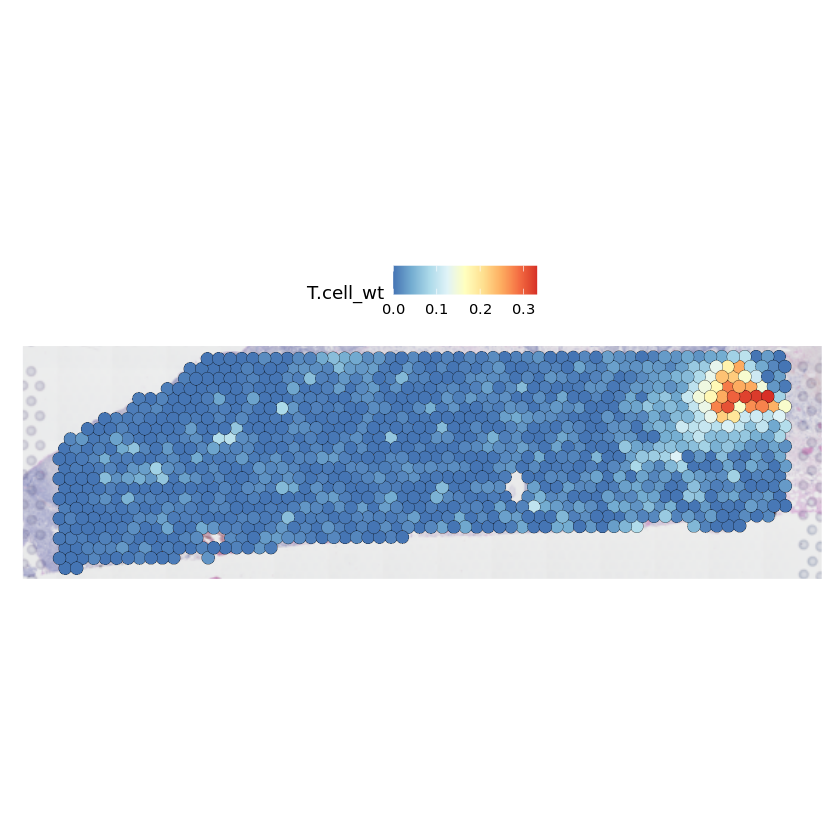

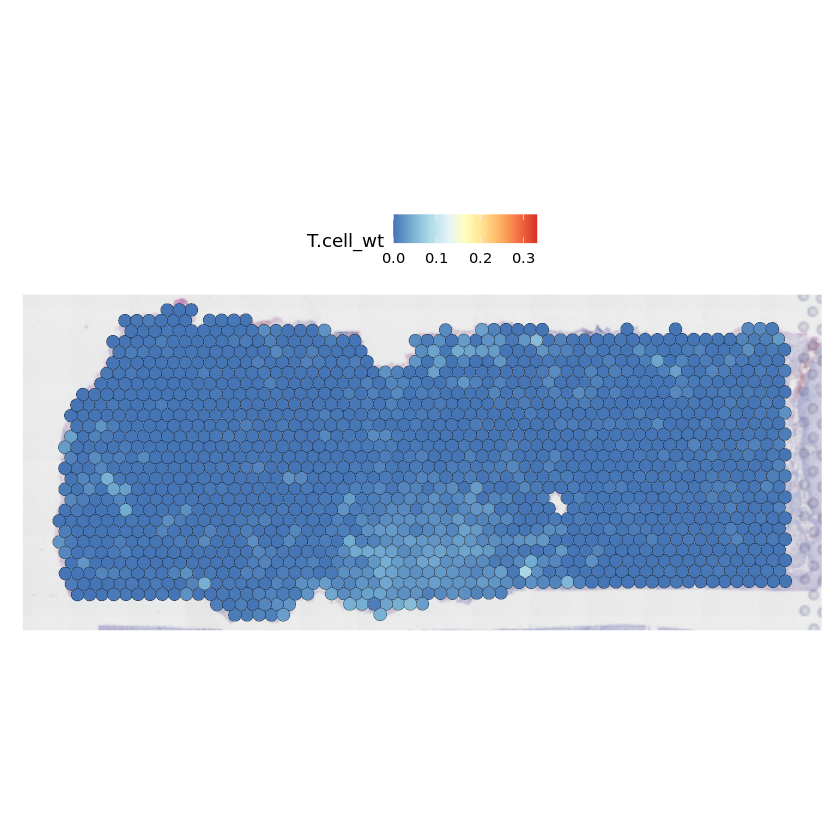

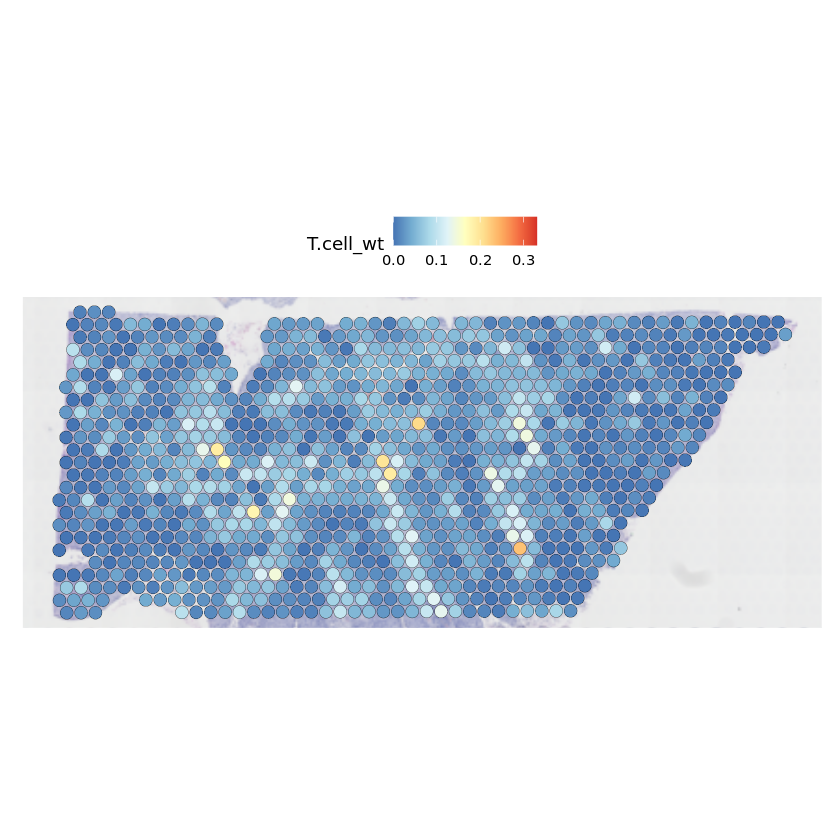

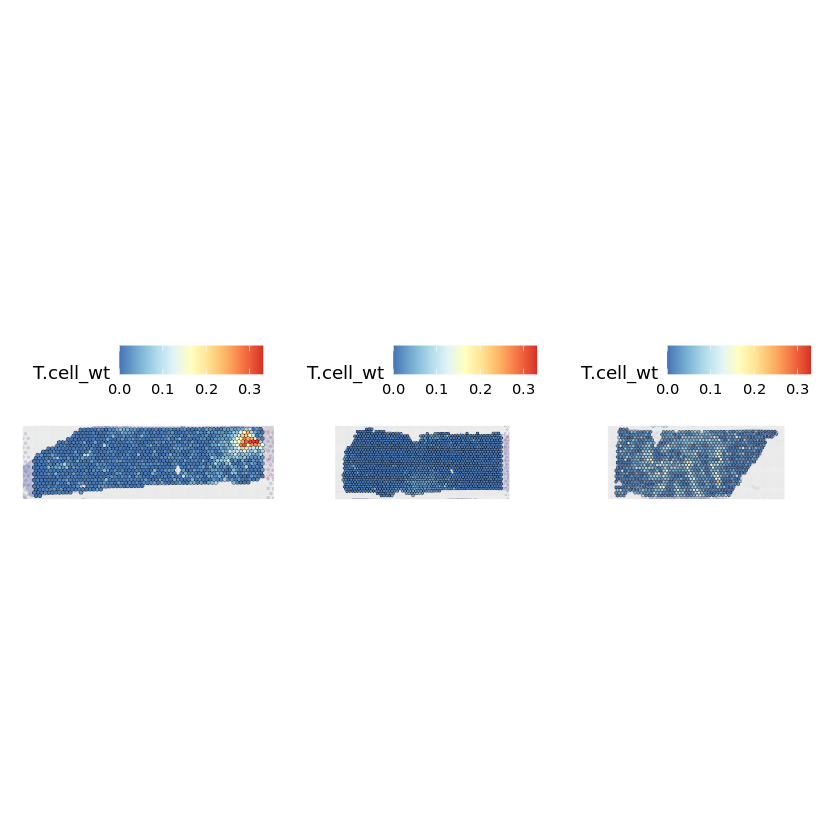

In [82]:
p_A1
p_A2
p_A3
p_T2

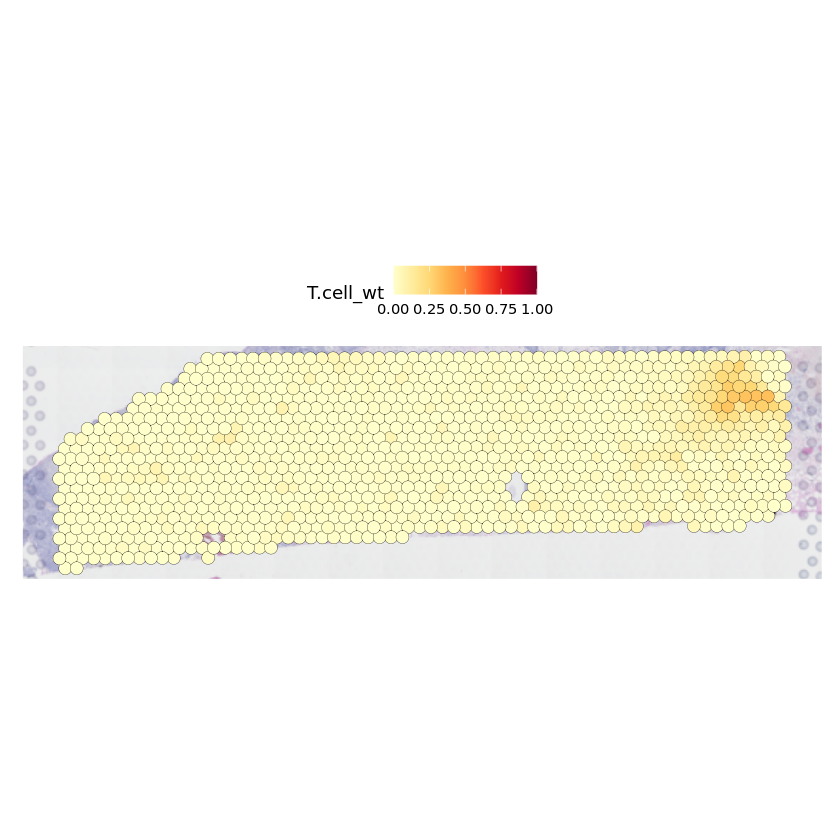

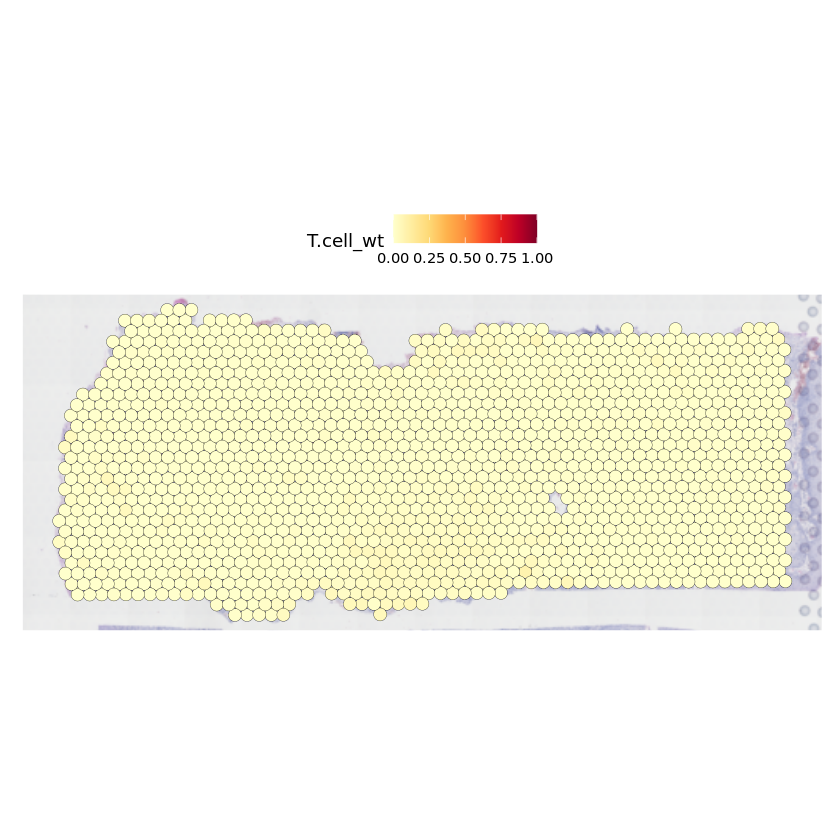

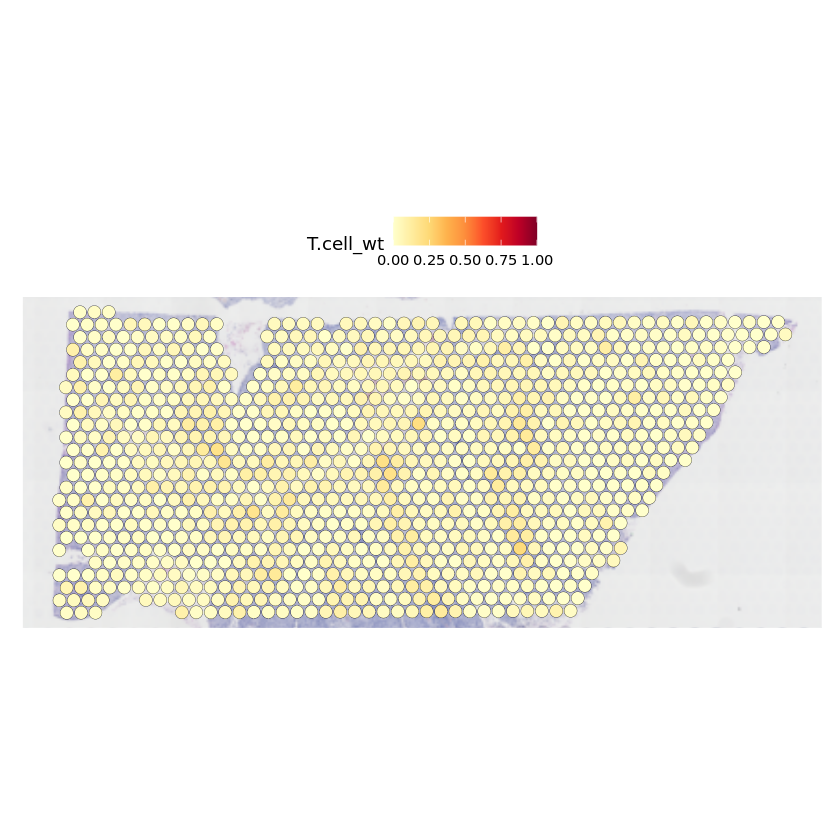

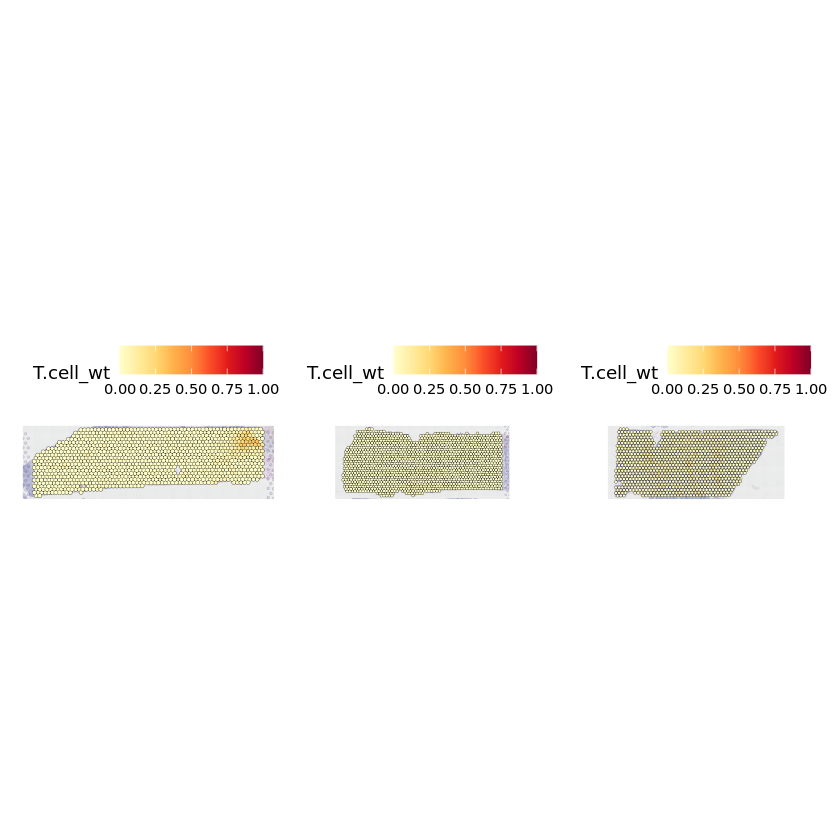

In [86]:
p_A1
p_A2
p_A3
p_T2

In [27]:
#saving as an image .jpeg instead of .pdf
dir.create(file.path(outdir, "scores_ownscore"), showWarnings = FALSE)
dir.create(file.path(outdir, "scores_zeroToOne"), showWarnings = FALSE)
for (i in colnames(norm_weights)) {
  # make sure each plot has the same scale
  data_A1 <- SpatialFeaturePlot(A1, features = i)
  data_A2 <- SpatialFeaturePlot(A2, features = i)
  data_A3 <- SpatialFeaturePlot(A3, features = i)
  data <- rbind(data_A1$data, data_A2$data, data_A3$data)
  maxval <- max(data[,i], na.rm = TRUE)
  
  # plot the graphs with a celltype-specific scale
  p_A1 <- SpatialFeaturePlot(A1, features = i) + 
    theme(aspect.ratio = ratio_A1) +
    scale_fill_gradientn(limits = c(0, maxval), colors = rev(brewer.pal(9, "RdYlBu")))
  p_A2 <- SpatialFeaturePlot(A2, features = i) + 
    theme(aspect.ratio = ratio_A2) +
    scale_fill_gradientn(limits = c(0, maxval), colors = rev(brewer.pal(9, "RdYlBu")))
  p_A3 <- SpatialFeaturePlot(A3, features = i) + 
    theme(aspect.ratio = ratio_A3) +
    scale_fill_gradientn(limits = c(0, maxval), colors = rev(brewer.pal(9, "RdYlBu")))
  p_T2 <- p_A1 + p_A2 + p_A3

  ggsave(plot = p_A1, filename = paste0(outdir, "scores_ownscore/", "weights_", i, "_A1_ownscale.jpeg"))  
  ggsave(plot = p_A2, filename = paste0(outdir, "scores_ownscore/", "weights_", i, "_A2_ownscale.jpeg"))  
  ggsave(plot = p_A3, filename = paste0(outdir, "scores_ownscore/", "weights_", i, "_A3_ownscale.jpeg"))  
  ggsave(plot = p_T2, filename = paste0(outdir, "scores_ownscore/", "weights_", i, "_T2_ownscale.jpeg"))  
  
    # plot the graphs with zero-to-one scale
  p_A1 <- SpatialFeaturePlot(A1, features = i) + 
    theme(aspect.ratio = ratio_A1) +
    scale_fill_gradientn(limits = c(0, 1), colors = brewer.pal(9, "YlOrRd"))
  p_A2 <- SpatialFeaturePlot(A2, features = i) + 
    theme(aspect.ratio = ratio_A2) +
    scale_fill_gradientn(limits = c(0, 1), colors = brewer.pal(9, "YlOrRd"))
  p_A3 <- SpatialFeaturePlot(A3, features = i) + 
    theme(aspect.ratio = ratio_A3) +
    scale_fill_gradientn(limits = c(0, 1), colors = brewer.pal(9, "YlOrRd"))
  p_T2 <- p_A1 + p_A2 + p_A3

  ggsave(plot = p_A1, filename = paste0(outdir, "scores_zeroToOne/", "weights_", i, "_A1_fixedscale.jpeg"))  
  ggsave(plot = p_A2, filename = paste0(outdir, "scores_zeroToOne/", "weights_", i, "_A2_fixedscale.jpeg"))  
  ggsave(plot = p_A3, filename = paste0(outdir, "scores_zeroToOne/", "weights_", i, "_A3_fixedscale.jpeg"))  
  ggsave(plot = p_T2, filename = paste0(outdir, "scores_zeroToOne/", "weights_", i, "_T2_fixedscale.jpeg"))  
}

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Saving 6.67 x 6.67 in image


Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Warning

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is al

# Setting a threshold of 10%

In [28]:
dir.create(file.path(outdir, "10pcpresenceabsence"), showWarnings = FALSE)
binary_presence <- norm_weights
binary_presence[binary_presence >= 0.1] <- 1
binary_presence[binary_presence < 0.1] <- 0
colnames(binary_presence) <- paste0(colnames(binary_presence), "_10pcbinary") %>% gsub("_wt", "", .)
write.table(binary_presence, file = paste0(outdir, "10pcpresenceabsence/", "presenceabsence_10pc.txt"), sep = "\t", quote = FALSE, col.names = NA)
A1 <- AddMetaData(A1, metadata = binary_presence)
A2 <- AddMetaData(A2, metadata = binary_presence)
A3 <- AddMetaData(A3, metadata = binary_presence)


In [29]:
for (i in colnames(binary_presence)) {
  p_A1 <- SpatialFeaturePlot(A1, features = i) + 
    theme(aspect.ratio = ratio_A1) +
    scale_fill_gradientn(limits = c(0, 1), colors = c("white", "lightseagreen"))
  p_A2 <- SpatialFeaturePlot(A2, features = i) + 
    theme(aspect.ratio = ratio_A2) +
    scale_fill_gradientn(limits = c(0, 1), colors = c("white", "lightseagreen"))
  p_A3 <- SpatialFeaturePlot(A3, features = i) + 
    theme(aspect.ratio = ratio_A3) +
    scale_fill_gradientn(limits = c(0, 1), colors = c("white", "lightseagreen"))
  p_T2 <- p_A1 + p_A2 + p_A3

  ggsave(plot = p_A1, filename = paste0(outdir, "10pcpresenceabsence/", i, "_A1_10pc.jpeg"))  
  ggsave(plot = p_A2, filename = paste0(outdir, "10pcpresenceabsence/", i, "_A2_10pc.jpeg"))  
  ggsave(plot = p_A3, filename = paste0(outdir, "10pcpresenceabsence/", i, "_A3_10pc.jpeg"))  
  ggsave(plot = p_T2, filename = paste0(outdir, "10pcpresenceabsence/", i, "_T2_10pc.jpeg"))  
}

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:

# Setting a threshold of 30%

In [30]:
dir.create(file.path(outdir, "30pcpresenceabsence"), showWarnings = FALSE)
binary_presence <- norm_weights
binary_presence[binary_presence >= 0.3] <- 1
binary_presence[binary_presence < 0.1] <- 0
colnames(binary_presence) <- paste0(colnames(binary_presence), "_30pcbinary") %>% gsub("_wt", "", .)
write.table(binary_presence, file = paste0(outdir, "30pcpresenceabsence/", "presenceabsence_30pc.txt"), sep = "\t", quote = FALSE, col.names = NA)
A1 <- AddMetaData(A1, metadata = binary_presence)
A2 <- AddMetaData(A2, metadata = binary_presence)
A3 <- AddMetaData(A3, metadata = binary_presence)


In [31]:
for (i in colnames(binary_presence)) {
  p_A1 <- SpatialFeaturePlot(A1, features = i) + 
    theme(aspect.ratio = ratio_A1) +
    scale_fill_gradientn(limits = c(0, 1), colors = c("white", "lightseagreen"))
  p_A2 <- SpatialFeaturePlot(A2, features = i) + 
    theme(aspect.ratio = ratio_A2) +
    scale_fill_gradientn(limits = c(0, 1), colors = c("white", "lightseagreen"))
  p_A3 <- SpatialFeaturePlot(A3, features = i) + 
    theme(aspect.ratio = ratio_A3) +
    scale_fill_gradientn(limits = c(0, 1), colors = c("white", "lightseagreen"))
  p_T2 <- p_A1 + p_A2 + p_A3

  ggsave(plot = p_A1, filename = paste0(outdir, "30pcpresenceabsence/", i, "_A1_30pc.jpeg"))  
  ggsave(plot = p_A2, filename = paste0(outdir, "30pcpresenceabsence/", i, "_A2_30pc.jpeg"))  
  ggsave(plot = p_A3, filename = paste0(outdir, "30pcpresenceabsence/", i, "_A3_30pc.jpeg"))  
  ggsave(plot = p_T2, filename = paste0(outdir, "30pcpresenceabsence/", i, "_T2_30pc.jpeg"))  
}

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:

# Setting a threshold of 7%

In [32]:
dir.create(file.path(outdir, "7pcpresenceabsence"), showWarnings = FALSE)
binary_presence <- norm_weights
binary_presence[binary_presence >= 0.07] <- 1
binary_presence[binary_presence < 0.1] <- 0
colnames(binary_presence) <- paste0(colnames(binary_presence), "_7pcbinary") %>% gsub("_wt", "", .)
write.table(binary_presence, file = paste0(outdir, "7pcpresenceabsence/", "presenceabsence_7pc.txt"), sep = "\t", quote = FALSE, col.names = NA)
A1 <- AddMetaData(A1, metadata = binary_presence)
A2 <- AddMetaData(A2, metadata = binary_presence)
A3 <- AddMetaData(A3, metadata = binary_presence)

In [33]:
for (i in colnames(binary_presence)) {
  p_A1 <- SpatialFeaturePlot(A1, features = i) + 
    theme(aspect.ratio = ratio_A1) +
    scale_fill_gradientn(limits = c(0, 1), colors = c("white", "lightseagreen"))
  p_A2 <- SpatialFeaturePlot(A2, features = i) + 
    theme(aspect.ratio = ratio_A2) +
    scale_fill_gradientn(limits = c(0, 1), colors = c("white", "lightseagreen"))
  p_A3 <- SpatialFeaturePlot(A3, features = i) + 
    theme(aspect.ratio = ratio_A3) +
    scale_fill_gradientn(limits = c(0, 1), colors = c("white", "lightseagreen"))
  p_T2 <- p_A1 + p_A2 + p_A3

  ggsave(plot = p_A1, filename = paste0(outdir, "7pcpresenceabsence/", i, "_A1_7pc.jpeg"))  
  ggsave(plot = p_A2, filename = paste0(outdir, "7pcpresenceabsence/", i, "_A2_7pc.jpeg"))  
  ggsave(plot = p_A3, filename = paste0(outdir, "7pcpresenceabsence/", i, "_A3_7pc.jpeg"))  
  ggsave(plot = p_T2, filename = paste0(outdir, "7pcpresenceabsence/", i, "_T2_7pc.jpeg"))  
}

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:

# Plot major types (based off doublet predictions)

In [34]:
doublet_hits <- myRCTD_db@results$results_df
query <- AddMetaData(query, doublet_hits)
A1 <- AddMetaData(A1, metadata = doublet_hits)
A2 <- AddMetaData(A2, metadata = doublet_hits)
A3 <- AddMetaData(A3, metadata = doublet_hits)


In [35]:
dir.create(file.path(outdir, "doublets"), showWarnings = FALSE)


palette_class <- c(`reject` = "grey50",
                   `singlet` = "red2",
                   `doublet_certain` = "gold",
                   `doublet_uncertain` = "black")

  p_A1 <- SpatialDimPlot(A1, group.by = "spot_class", cols = palette_class) + 
    theme(aspect.ratio = ratio_A1)
  p_A2 <- SpatialDimPlot(A2, group.by = "spot_class", cols = palette_class) + 
    theme(aspect.ratio = ratio_A2)
  p_A3 <- SpatialDimPlot(A3, group.by = "spot_class", cols = palette_class) + 
    theme(aspect.ratio = ratio_A3)
  p_T2 <- p_A1 + p_A2 + p_A3

  ggsave(plot = p_A1, filename = paste0(outdir, "doublets/", "A1.jpeg"))  
  ggsave(plot = p_A2, filename = paste0(outdir, "doublets/", "A2.jpeg"))  
  ggsave(plot = p_A3, filename = paste0(outdir, "doublets/", "A3.jpeg"))  
  ggsave(plot = p_T2, filename = paste0(outdir, "doublets/", "T2.jpeg"))  


Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



# Plot first type cells - based off doublet predictions

In [36]:
palette = c(`neutrophils`= "red2",
            `microglia` = "darkmagenta", 
            `monocytes` = "seagreen",
            `NKT` = "coral",
            `Bcells` = "turquoise",
            `macrophages` = "deeppink",
            `DCs` = "dodgerblue",
            
            `Astrocyte` = "limegreen",
            `Oligodendrocyte` = "navyblue",
            `Neuron` = "violet",
            `Fibroblast` = "gold2",
            `OPC` = "deeppink4",
            `Ependymal` = "black",
            `Endothelial` = "plum4",
            `Pericyte` = "saddlebrown",
            `NA` = "grey50")

In [37]:
  p_A1 <- SpatialDimPlot(A1, group.by = "first_type", cols = palette) + 
    theme(aspect.ratio = ratio_A1)
  p_A2 <- SpatialDimPlot(A2, group.by = "first_type", cols = palette) + 
    theme(aspect.ratio = ratio_A2)
  p_A3 <- SpatialDimPlot(A3, group.by = "first_type", cols = palette) + 
    theme(aspect.ratio = ratio_A3)
  p_T2 <- p_A1 + p_A2 + p_A3

  ggsave(plot = p_A1, filename = paste0(outdir, "doublets/firsttype_", "A1.jpeg"))  
  ggsave(plot = p_A2, filename = paste0(outdir, "doublets/firsttype_", "A2.jpeg"))  
  ggsave(plot = p_A3, filename = paste0(outdir, "doublets/firsttype_", "A3.jpeg"))  
  ggsave(plot = p_T2, filename = paste0(outdir, "doublets/firsttype_", "T2.jpeg"))  

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



# Plot first cell type cells - based off all weights

In [38]:
# which normalisation column has the biggest score?
# first remove anything less than 7%
norm_weights_all_calcMax <- norm_weights
norm_weights_all_calcMax[norm_weights_all_calcMax < 0.07] <- 0
norm_weights_all_calcMax <- as.data.frame(norm_weights_all_calcMax)
norm_weights_all_calcMax$major <- colnames(norm_weights_all_calcMax)[max.col(norm_weights_all_calcMax,ties.method="random")]
norm_weights_all_calcMax$major <- gsub("_wt", "", norm_weights_all_calcMax$major)
norm_weights_all_calcMax <- norm_weights_all_calcMax[,"major" , drop = FALSE]

query <- AddMetaData(query, norm_weights_all_calcMax)
A1 <- AddMetaData(A1, metadata = norm_weights_all_calcMax)
A2 <- AddMetaData(A2, metadata = norm_weights_all_calcMax)
A3 <- AddMetaData(A3, metadata = norm_weights_all_calcMax)

In [39]:
  p_A1 <- SpatialDimPlot(A1, group.by = "major", cols = palette) + 
    theme(aspect.ratio = ratio_A1)
  p_A2 <- SpatialDimPlot(A2, group.by = "major", cols = palette) + 
    theme(aspect.ratio = ratio_A2)
  p_A3 <- SpatialDimPlot(A3, group.by = "major", cols = palette) + 
    theme(aspect.ratio = ratio_A3)
  p_T2 <- p_A1 + p_A2 + p_A3
  ggsave(plot = p_A1, filename = paste0(outdir, "doublets/firsttype_allweights", "A1.jpeg"))  
  ggsave(plot = p_A2, filename = paste0(outdir, "doublets/firsttype_allweights", "A2.jpeg"))  
  ggsave(plot = p_A3, filename = paste0(outdir, "doublets/firsttype_allweights", "A3.jpeg")) 
  ggsave(plot = p_T2, filename = paste0(outdir, "doublets/firsttype_allweights", "T2.jpeg"))  

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



# Cell colocalisation - doublets

In [40]:
doublet_hits2 <- doublet_hits[rownames(doublet_hits) %in% colnames(query),]

doublet_hits_tally <- as.data.frame(doublet_hits2 %>% group_by(first_type, second_type) %>% tally())

Saving 6.67 x 6.67 in image



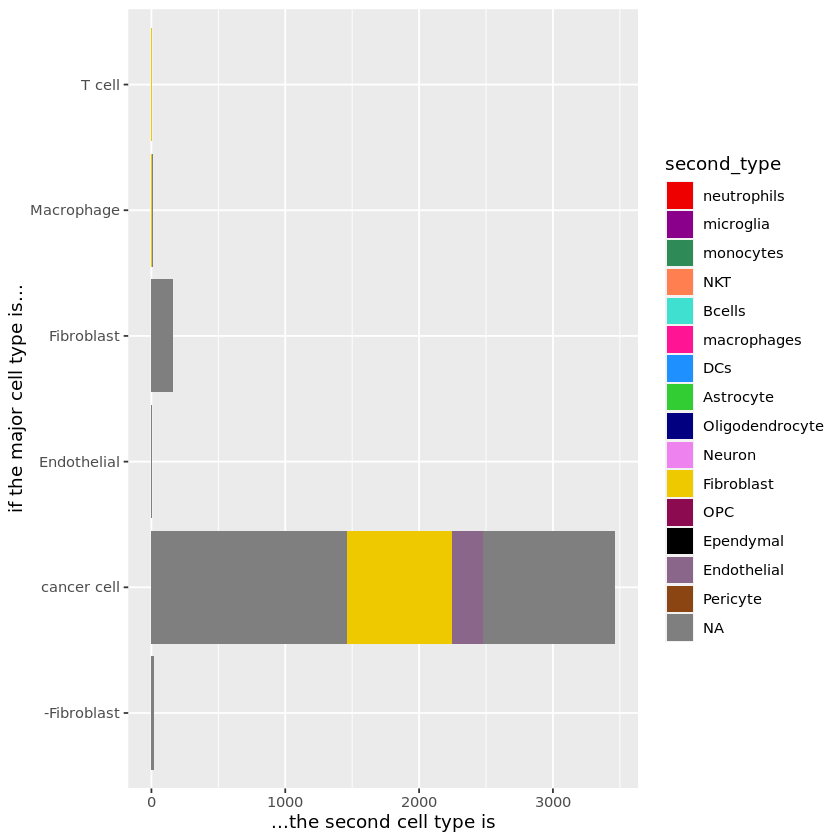

Saving 6.67 x 6.67 in image



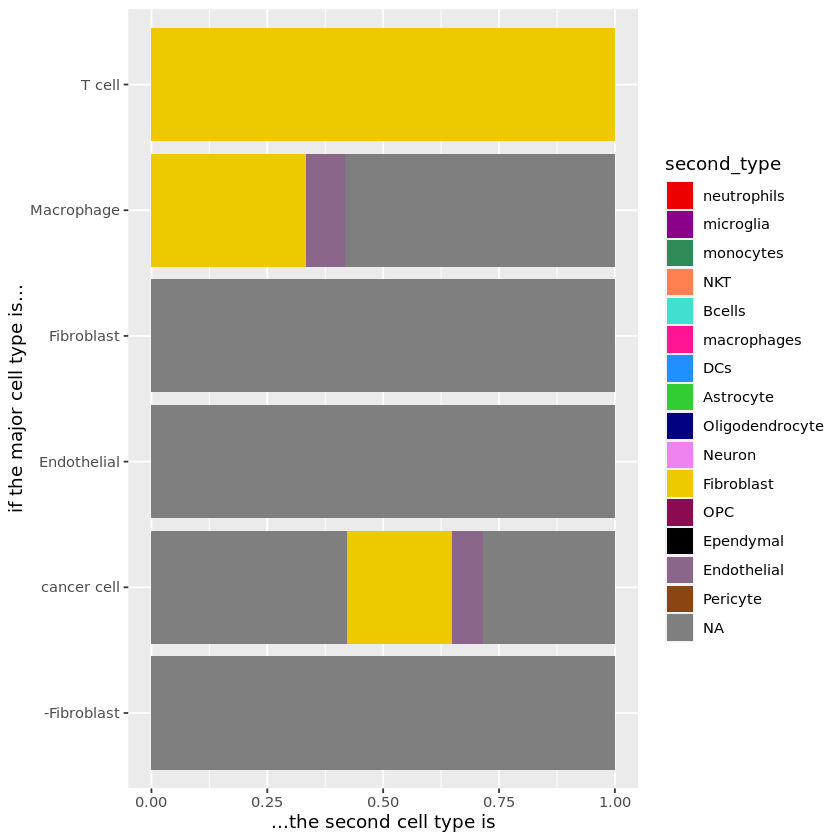

In [41]:
dir.create(file.path(outdir, "SecondSpotClass_DoubletMode"), showWarnings = FALSE)

ggplot(doublet_hits_tally, aes(fill=second_type, y=n, x=first_type)) + 
  geom_bar(position="stack", stat="identity") +
  scale_fill_manual(values = palette) +
  xlab("if the major cell type is...") +
  ylab("...the second cell type is") +
  coord_flip()
ggsave(filename = paste0(outdir, "SecondSpotClass_DoubletMode/", "allSamples_secondSpotClass.jpeg"))

ggplot(doublet_hits_tally, aes(fill=second_type, y=n, x=first_type)) + 
    geom_bar(position="fill", stat="identity") +
    scale_fill_manual(values = palette) +
    xlab("if the major cell type is...") +
    ylab("...the second cell type is") +
    coord_flip()
ggsave(filename = paste0(outdir, "SecondSpotClass_DoubletMode/", "allSamples_secondSpotClass_percent.jpeg"))

# Calculate for each timepoint?

In [42]:
# add in timepoint data
meta <- query[[c("tissues")]]
meta <- meta[rownames(doublet_hits2), , drop = FALSE]
doublet_hits2 <- cbind(doublet_hits2, meta)

In [43]:
for (i in unique(doublet_hits2$tissues)) {
  doublet_hits_all_temp <- doublet_hits2 %>% filter(tissues == i)
  doublet_hits_tally_temp <- as.data.frame(doublet_hits_all_temp %>% group_by(first_type, second_type) %>% tally())
  
  # plot
  ggplot(doublet_hits_tally_temp, aes(fill=second_type, y=n, x=first_type)) + 
  geom_bar(position="stack", stat="identity") +
  scale_fill_manual(values = palette) +
  xlab("if the major cell type is...") +
  ylab("...the second cell type is") +
  ggtitle(i) +
  coord_flip()
  ggsave(filename = paste0(outdir, "SecondSpotClass_DoubletMode/", i, "_secondSpotClass.jpeg"))

  ggplot(doublet_hits_tally_temp, aes(fill=second_type, y=n, x=first_type)) + 
    geom_bar(position="fill", stat="identity") +
    scale_fill_manual(values = palette) +
    xlab("if the major cell type is...") +
    ylab("...the second cell type is") +
    ggtitle(i) +
    coord_flip()
  ggsave(filename = paste0(outdir, "SecondSpotClass_DoubletMode/", i, "_secondSpotClass_percent.jpeg"))
}

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



# Cell colocalisation using weights

In [44]:
#How to calculate first and second cell type from weights
# which normalisation column has the biggest score?
# first remove anything less than 7%
norm_weights_all2 <- norm_weights[rownames(norm_weights) %in% colnames(query),]
norm_weights_all_calcMax <- norm_weights_all2
norm_weights_all_calcMax[norm_weights_all_calcMax < 0.07] <- 0
norm_weights_all_calcMax <- as.data.frame(norm_weights_all_calcMax)
norm_weights_all_calcMax$primary <- colnames(norm_weights_all_calcMax)[max.col(norm_weights_all_calcMax,ties.method="random")]
# is there a tie?
norm_weights_all_calcMax$tie <- rowSums(norm_weights_all_calcMax[1:(ncol(norm_weights_all_calcMax)-1)] == do.call(pmax, norm_weights_all_calcMax[1:(ncol(norm_weights_all_calcMax)-1)])) > 1
# get the second highest

maxn <- function(n) function(x) order(x, decreasing = TRUE)[n]
norm_weights_all_calcMax <- norm_weights_all_calcMax %>%
  mutate(secondary = apply(.[1:(ncol(norm_weights_all_calcMax) - 2)], 1, function(x) names(x)[maxn(2)(x)]) )

norm_weights_all_calcMax$primary <- gsub("_wt", "", norm_weights_all_calcMax$primary)
norm_weights_all_calcMax$secondary <- gsub("_wt", "", norm_weights_all_calcMax$secondary)

In [45]:
#doublet_hits_all[,c("first_type", "second_type")]
weight_hits_tally <- as.data.frame(norm_weights_all_calcMax %>% group_by(primary, secondary) %>% tally())

Saving 6.67 x 6.67 in image



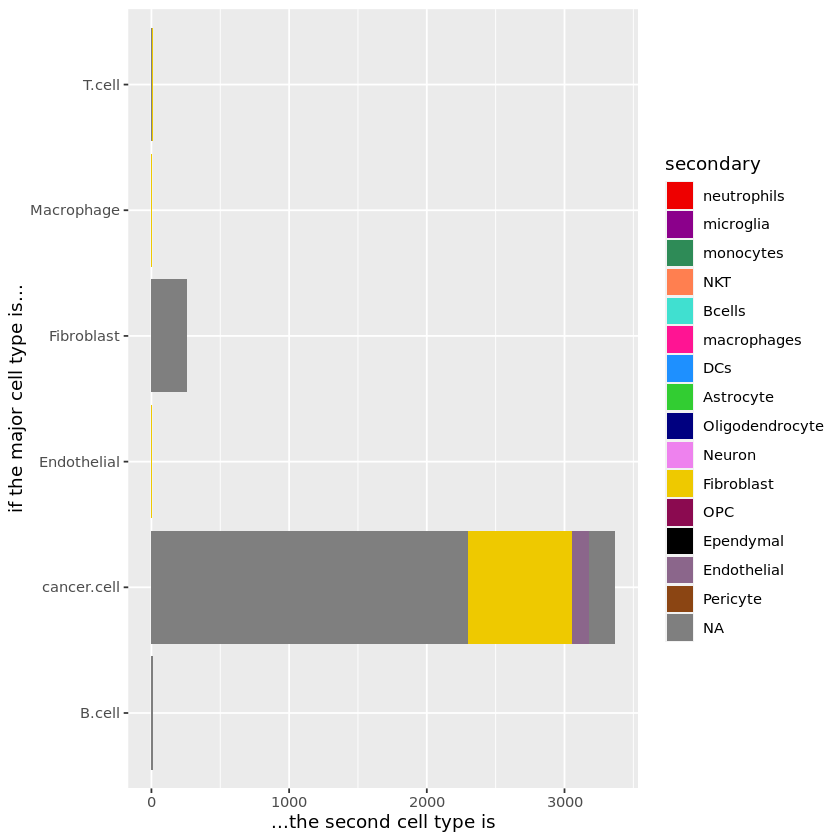

Saving 6.67 x 6.67 in image



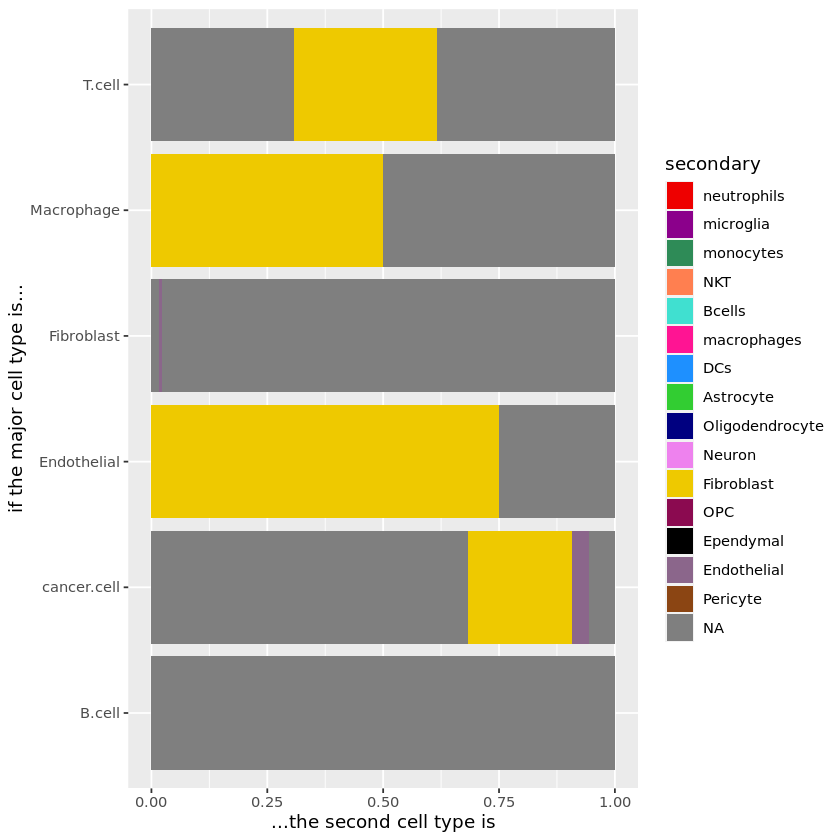

In [46]:
dir.create(file.path(outdir, "SecondSpotClass_FullModeWeights"), showWarnings = FALSE)

write.table(norm_weights_all_calcMax, file = paste0(outdir, "SecondSpotClass_FullModeWeights/", "weights_primarysecondary.txt"), sep = "\t", quote = FALSE, col.names = NA)

ggplot(weight_hits_tally, aes(fill=secondary, y=n, x=primary)) + 
  geom_bar(position="stack", stat="identity") +
  scale_fill_manual(values = palette) +
  xlab("if the major cell type is...") +
  ylab("...the second cell type is") +
  coord_flip()
ggsave(filename = paste0(outdir, "SecondSpotClass_FullModeWeights/", "allSamples_secondSpotClass.jpeg"))

ggplot(weight_hits_tally, aes(fill=secondary, y=n, x=primary)) + 
    geom_bar(position="fill", stat="identity") +
    scale_fill_manual(values = palette) +
    xlab("if the major cell type is...") +
    ylab("...the second cell type is") +
    coord_flip()
ggsave(filename = paste0(outdir, "SecondSpotClass_FullModeWeights/", "allSamples_secondSpotClass_percent.jpeg"))

# Calculate for each timepoint - using weights

In [47]:
# add in timepoint data
meta <- query[[c("tissues")]]
meta <- meta[rownames(norm_weights_all_calcMax), , drop = FALSE]
norm_weights_all_calcMax <- cbind(norm_weights_all_calcMax, meta)

In [48]:
for (i in unique(norm_weights_all_calcMax$tissues)) {
  norm_weights_all_calcMax_temp <- norm_weights_all_calcMax %>% filter(tissues == i)
  weight_hits_tally_temp <- as.data.frame(norm_weights_all_calcMax_temp %>% group_by(primary, secondary) %>% tally())
  
  # plot
  ggplot(weight_hits_tally_temp, aes(fill=secondary, y=n, x=primary)) + 
  geom_bar(position="stack", stat="identity") +
  scale_fill_manual(values = palette) +
  xlab("if the major cell type is...") +
  ylab("...the second cell type is") +
  ggtitle(i) +
  coord_flip()
  ggsave(filename = paste0(outdir, "SecondSpotClass_FullModeWeights/", i, "_secondSpotClass.jpeg"))

  ggplot(weight_hits_tally_temp, aes(fill=secondary, y=n, x=primary)) + 
    geom_bar(position="fill", stat="identity") +
    scale_fill_manual(values = palette) +
    xlab("if the major cell type is...") +
    ylab("...the second cell type is") +
    ggtitle(i) +
    coord_flip()
  ggsave(filename = paste0(outdir, "SecondSpotClass_FullModeWeights/", i, "_secondSpotClass_percent.jpeg"))
}

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



In [33]:
#loading other assays
datadir <- "/home/uqkngu23/90days/software/head_neck_cancer_VLP39_B2_outs" #must contain filtered_feature_bc_matrix.h5 file, and 
mysample_B2 <- Load10X_Spatial(datadir, filename = "filtered_feature_bc_matrix.h5", assay = "Spatial")
datadir2 <- "/home/uqkngu23/90days/software/head_neck_cancer_VLP39_C2_outs" #must contain filtered_feature_bc_matrix.h5 file, and 
mysample_C2 <- Load10X_Spatial(datadir2, filename = "filtered_feature_bc_matrix.h5", assay = "Spatial")
datadir3 <- "/home/uqkngu23/90days/software/head_neck_cancer_VLP39_D2_outs" #must contain filtered_feature_bc_matrix.h5 file, and 
mysample_D2 <- Load10X_Spatial(datadir3, filename = "filtered_feature_bc_matrix.h5", assay = "Spatial")

Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”
Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
“'giveCsparse' has been deprecated; setting 'repr = "T"' for you”


In [34]:
#demultiplexing samples
#adding recurrence info
my.tissues_B2 <- read.delim("/home/uqkngu23/90days/software/head_neck_cancer_VLP39_B2_outs/B1_recurrent.csv", sep = ",", header = TRUE)
my.tissues_B2$recurrent <- sub("^$", "N", my.tissues_B2$recurrent)

#add annotations into mysample
#B2
mysample_B2[["recurrent"]] <- my.tissues_B2$recurrent

#splitting array into individual tissues
tissueID_B2 <- read.delim("/home/uqkngu23/90days/software/head_neck_cancer_VLP39_B2_outs/B2_tissue.csv", sep = ",", header = TRUE)
#adding annotation to full data
mysample_B2[["tissues"]] <- tissueID_B2$Tissue

#--------------------------
#demultiplexing samples
#adding recurrence info
my.tissues_C2 <- read.delim("/home/uqkngu23/90days/software/head_neck_cancer_VLP39_C2_outs/C1_recurrent.csv", sep = ",", header = TRUE)
my.tissues_C2$recurrent <- sub("^$", "N", my.tissues_C2$recurrent)

#add annotations into mysample
#C2
mysample_C2[["recurrent"]] <- my.tissues_C2$recurrent

#splitting array into individual tissues
tissueID_C2 <- read.delim("/home/uqkngu23/90days/software/head_neck_cancer_VLP39_C2_outs/C2_tissue.csv", sep = ",", header = TRUE)
#adding annotation to full data
mysample_C2[["tissues"]] <- tissueID_C2$Tissue

#----------------------------
#demultiplexing samples
#adding recurrence info
my.tissues_D2 <- read.delim("/home/uqkngu23/90days/software/head_neck_cancer_VLP39_D2_outs/D1_recurrent.csv", sep = ",", header = TRUE)
my.tissues_D2$recurrent <- sub("^$", "N", my.tissues_D2$recurrent)

#add annotations into mysample
#D2
mysample_D2[["recurrent"]] <- my.tissues_D2$recurrent

#splitting array into individual tissues
tissueID_D2 <- read.delim("/home/uqkngu23/90days/software/head_neck_cancer_VLP39_D2_outs/D2_tissue.csv", sep = ",", header = TRUE)
#adding annotation to full data
mysample_D2[["tissues"]] <- tissueID_D2$Tissue

#removing unassigned portion
mysample_D22 <-  mysample_D2[, mysample_D2$tissues != "unassigned"]

In [35]:
##QC
#B2
#removing spots with less then 100 genes
selected_c <- WhichCells(mysample_B2, expression = nFeature_Spatial > 100)
#removing genes that are in less then 3 spots
selected_f <- rownames(mysample_B2)[Matrix::rowSums(mysample_B2) > 3]
data.filt_B <- subset(mysample_B2, features = selected_f, cells = selected_c)
#-----------------------------------------------------------------------------------
#C2
#removing spots with less then 100 genes
selected_c <- WhichCells(mysample_C2, expression = nFeature_Spatial > 100)
#removing genes that are in less then 3 spots
selected_f <- rownames(mysample_C2)[Matrix::rowSums(mysample_C2) > 3]
data.filt_C <- subset(mysample_C2, features = selected_f, cells = selected_c)
#-----------------------------------------------------------------------------------
#D2
#removing spots with less then 100 genes
selected_c <- WhichCells(mysample_D22, expression = nFeature_Spatial > 100)
#removing genes that are in less then 3 spots
selected_f <- rownames(mysample_D22)[Matrix::rowSums(mysample_D22) > 3]
data.filt_D <- subset(mysample_D22, features = selected_f, cells = selected_c)

Analysis of array B2

In [36]:
#assigning data
query <- data.filt_B
ref <- hnc_seurat
#refcol <- hnc_seurat$non.cancer.cell.type"non.cancer.cell.type"
refcol <- "non.cancer.cell.type"

In [37]:
outdir <- "/home/uqkngu23/90days/software/hncancer_collab_analysis/rctd_outs/"
# Prepare the reference data
counts_ref <- as.matrix(ref@assays$RNA@counts)
#round numbers to an integer
counts_ref <- round(counts_ref, digits = 0)
cell_types_ref <- as.factor(ref[[]][,refcol])
names(cell_types_ref) <- colnames(ref)
reference <- spacexr::Reference(counts = counts_ref, cell_types = cell_types_ref)
saveRDS(reference, paste0(outdir, "B2_SCRef.RDS"))


Warning message in if (class(counts) != "dgCMatrix") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(counts) != "matrix") tryCatch({:
“the condition has length > 1 and only the first element will be used”


# RUN RCTD

In [38]:
print("defining functions to get coordinates")
## coordinates
getcoords <- function(whichImageNbr) {
  coords <- query@images[[whichImageNbr]]@coordinates[c(5,4)]
  colnames(coords) <- c("x", "y")
  coords$y <- coords$y * -1
  name <- names(query@images)[whichImageNbr]
  coords$image <- name
  coords <- as.data.frame(coords)
  return(coords)
}

[1] "defining functions to get coordinates"


In [39]:
modifycoords <- function(whichImageNbr) {
  max_prev <- max(coords_all[[whichImageNbr - 1]]$x)
  coords_all[[whichImageNbr]]$x <- coords_all[[whichImageNbr]]$x + max_prev
  return(coords_all)
}


In [40]:
print("getting coordinates")
### get the coordinates from each image, and then combine into a list of lists
coords_all <- lapply(1:length(names(query@images)), getcoords) #could unlist if this is at the end
# now for each list we add an x-axis factor so we can put all the lists together
if (length(coords_all) > 1) {
  # get the starting coords to add to the 2nd array
  max1 <- max(coords_all[[1]]$x)
  # for the 2nd array, add coordinates of the first one
  coords_all[[2]]$x <- coords_all[[2]]$x + max1
  # for all subsequent arrays, add the coordinates of the previous one
  if (length(coords_all) > 2) {
    coords_all <- lapply(3:length(names(query@images)), modifycoords) #could unlist if this is at the end
  } else {coords_all <- list(coords_all)}
} else {coords_all <- list(coords_all)}
# this won't actually work with 4 arrays, and IDK if it will work with 2
saveRDS(coords_all, file = paste0(outdir, "B2_coords_all_interim.RDS"))

print("finalising coordinates 1")
coords_all <- coords_all[[1]]
print("finalising coordinates 2")


[1] "getting coordinates"
[1] "finalising coordinates 1"
[1] "finalising coordinates 2"


In [41]:
#converting to df
coords_all <- do.call(rbind.data.frame, coords_all)

[1] "plotting coordinates"
[1] "saving coordinates plot"


Saving 6.67 x 6.67 in image



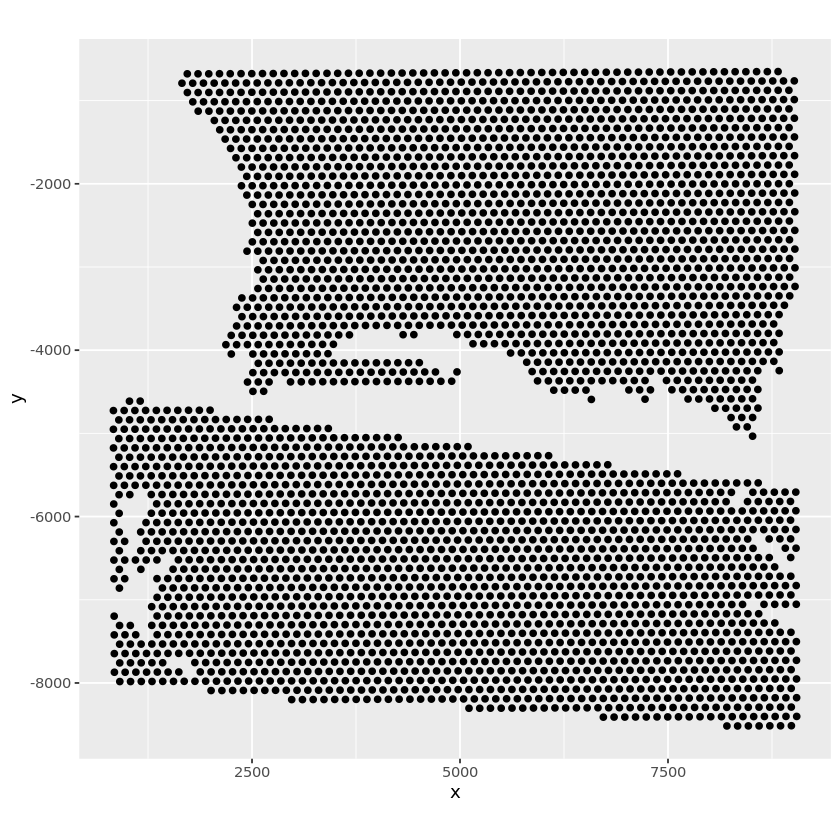

In [42]:
print("plotting coordinates")
#print(colnames(coords_all))
p3 <- ggplot(coords_all, aes(x = x, y = y)) + geom_point() + coord_fixed()
p3
print("saving coordinates plot")
ggsave(plot = p3, filename = paste0(outdir, "B2_coord_plot.jpeg"))
write.table(coords_all, file = paste0(outdir, "B2_allcoordinates.txt"), sep = "\t", quote = FALSE)


In [43]:
coords_all_RCTD <- coords_all[1:2]
write.table(data.frame("barcodes"=rownames(coords_all_RCTD),coords_all_RCTD),paste0(outdir, "B2_Coordinates.csv"), row.names=FALSE, sep = ",", quote = FALSE, col.names = c("barcodes", "xcoord", "ycoord"))


In [44]:
### Get counts
print("preparing counts")
counts <- as.matrix(query@assays[[1]]@counts) #get whatever the first one is i.e. raw data
write.table(counts,paste0(outdir, "B2_MappedDGEForR.csv"), sep = ",", quote = FALSE, col.names = NA)


[1] "preparing counts"


In [45]:
### Make RCTD object (puck)
print("preparing RCTD object")
puck <- SpatialRNA(coords = coords_all_RCTD, counts = counts[colnames(counts) %in% rownames(coords_all_RCTD),])
saveRDS(puck, file = paste0(outdir, "B2_puckObject.RDS"))
barcodes <- colnames(puck@counts) #pixels to be used (a list of barcode names). 

jpeg(filename = paste0(outdir, "B2_puckCoords.jpeg"))
plot_puck_continuous(puck, barcodes, puck@nUMI, ylimit = c(0,round(quantile(puck@nUMI,0.9))), 
                     title ='plot of nUMI') 
dev.off()


[1] "preparing RCTD object"


Warning message in if (class(counts) != "dgCMatrix") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(counts) != "matrix") tryCatch({:
“the condition has length > 1 and only the first element will be used”


png 
  2

# RUN RCTD

In [46]:
print("step 3 - running RCTD")
myRCTD <- create.RCTD(puck, reference, max_cores = 8, CELL_MIN_INSTANCE = 10)
saveRDS(myRCTD, file = paste0(outdir, "B2_myRCTD_preRun.RDS"))
myRCTD_db <- run.RCTD(myRCTD, doublet_mode = "doublet")
myRCTD_full <- run.RCTD(myRCTD, doublet_mode = "full")
myRCTD_multi <- run.RCTD(myRCTD, doublet_mode = "multi")


[1] "step 3 - running RCTD"


Begin: process_cell_type_info

process_cell_type_info: number of cells in reference: 5902

process_cell_type_info: number of genes in reference: 23686




-Fibroblast      B cell cancer cell   Dendritic Endothelial  Fibroblast 
         18         138        2539          51         260        1422 
 Macrophage        Mast     myocyte      T cell 
         98         120          19        1237 


End: process_cell_type_info

create.RCTD: getting regression differentially expressed genes: 

get_de_genes: -Fibroblast found DE genes: 91

get_de_genes: B cell found DE genes: 277

get_de_genes: cancer cell found DE genes: 111

get_de_genes: Dendritic found DE genes: 306

get_de_genes: Endothelial found DE genes: 172

get_de_genes: Fibroblast found DE genes: 170

get_de_genes: Macrophage found DE genes: 266

get_de_genes: Mast found DE genes: 234

get_de_genes: myocyte found DE genes: 356

get_de_genes: T cell found DE genes: 197

get_de_genes: total DE genes: 1787

create.RCTD: getting platform effect normalization differentially expressed genes: 

get_de_genes: -Fibroblast found DE genes: 503

get_de_genes: B cell found DE genes: 576

get_de_genes: cancer cell found DE genes: 491

get_de_genes: Dendritic found DE genes: 704

get_de_genes: Endothelial found DE genes: 442

get_de_genes: Fibroblast found DE genes: 403

get_de_genes: Macrophage found DE genes: 605

get_de_genes: Mast f

[1] "gather_results: finished 1000"
[1] "gather_results: finished 2000"
[1] "gather_results: finished 3000"


fitBulk: decomposing bulk

chooseSigma: using initial Q_mat with sigma =  1

Likelihood value: 1396575.05460005

Sigma value:  0.84

Likelihood value: 1378093.37306563

Sigma value:  0.69

Likelihood value: 1365809.30059314

Sigma value:  0.61

Likelihood value: 1361902.01649949

Sigma value:  0.54

Likelihood value: 1360314.55124085

Sigma value:  0.53

Likelihood value: 1360240.72242274

Sigma value:  0.52

Likelihood value: 1360207.09248071

Sigma value:  0.52

fitBulk: decomposing bulk

chooseSigma: using initial Q_mat with sigma =  1

Likelihood value: 1395721.82069462

Sigma value:  0.84

Likelihood value: 1376680.46677147

Sigma value:  0.69

Likelihood value: 1363755.83476077

Sigma value:  0.61

Likelihood value: 1359453.07717567

Sigma value:  0.53

Likelihood value: 1357358.21863484

Sigma value:  0.51

Likelihood value: 1357218.06005991

Sigma value:  0.51



In [47]:
print("saving RCTD")
saveRDS(myRCTD_db, file = paste0(outdir, "B2_myRCTD_doublet.RDS"))
saveRDS(myRCTD_full, file = paste0(outdir, "B2_myRCTD_full.RDS"))
saveRDS(myRCTD_multi, file = paste0(outdir, "B2_myRCTD_multi.RDS"))


[1] "saving RCTD"


# SESSION INFO

In [48]:
print("RCTD finished!")

sink(paste0(outdir, "B2_sessionInfo.txt"))
sessionInfo()
sink()

[1] "RCTD finished!"


R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /scratch/90days/uqkngu23/software/seurat4/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] Matrix_1.4-0       dplyr_1.0.8        ggplot2_3.3.5      SeuratObject_4.0.4
[5] Seurat_4.1.0       spacexr_2.0.0     

loaded via a namespace (and not attached):
  [1] Rtsne_0.16            colorspace_2.0-3      deldir_1.0-6         
  [4] ellipsis_0.3.2        ggridges_0.5.3        IRdispl